# PROJECT

## Name:Ramanand k

# Business Case: Yulu - Hypothesis Testing

# About yulu

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# Buisness Problem

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Problem statements

- Study the dataset for data cleaning and preprocessing
- Understanding the correlation of the numerical data
- Data visualisation steps like univariate,bivariate and multivariate analysis between different features
- Performing hypothesis testing between different features
- chi square test to check weather has any impact on the season
- chi square test to check weather has any impact on working days
- anova test to check bike usage has any impact on the season
- anova test to check bike usage has any impact on the weather

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dat
df=pd.read_csv("bike_sharing.csv")

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
#shape of the data
df.shape

(10886, 12)

In [5]:
# data types of each column
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
# unique values for each features
for i in df.columns:
    print(df[i].unique())

['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
[1 2 3 4]
[0 1]
[0 1]
[1 2 3 4]
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  3

In [7]:
# counts of each value
for i in df.columns:
    print(df[i].value_counts())

2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.

In [8]:
#statistical summary of the data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#total no of duplicate values
df.duplicated().sum()

0

In [10]:
# there is no duplicate values

In [11]:
#total no of null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
#changing datetime to date time format
df["datetime"]=pd.to_datetime(df["datetime"])

# Univariate Analysis

# Histogram of Features

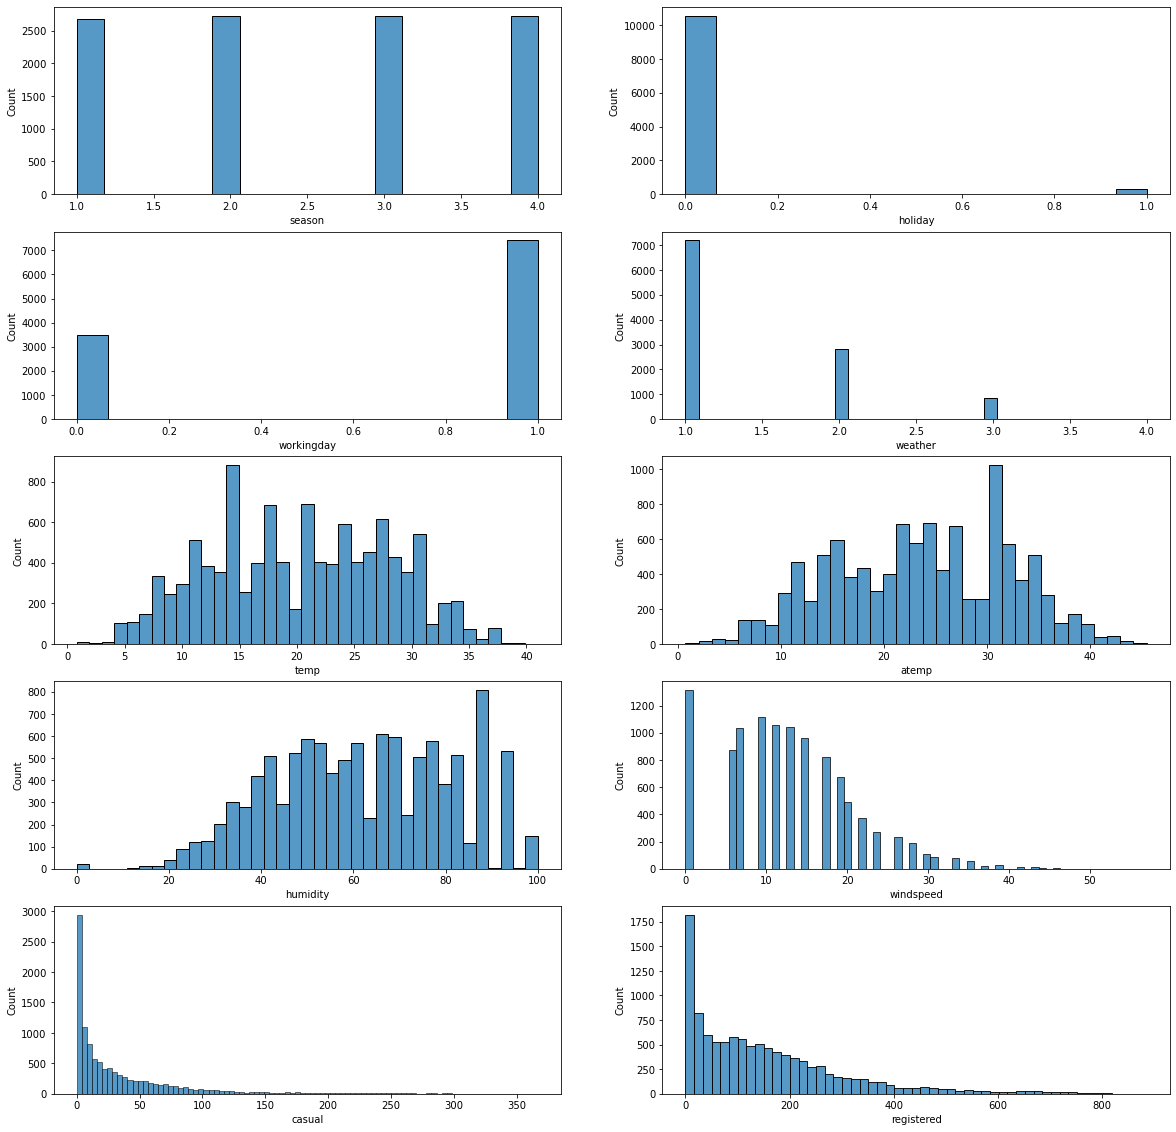

In [13]:
lst=['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
fig,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
count=0
for row in range(5):
    for col in range(2):
        sns.histplot(data=df,x=lst[count],ax=axs[row,col],palette='Set4')
        count=count+1
plt.show()

# Bivariate and Multivariate Analysis

# Effect of weather on count

In [14]:
df.groupby("weather")["count"].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

<AxesSubplot:xlabel='weather'>

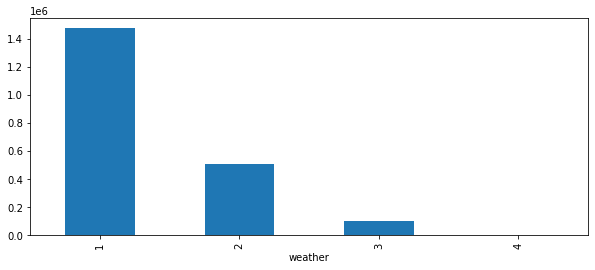

In [15]:
plt.figure(figsize=(10,4))
df.groupby("weather")["count"].sum().plot.bar()

#### total users on weather 1 is higher than others
#### total users on weather 4 is very less

# Average  user on each weather

In [16]:
df.groupby("weather")["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

<AxesSubplot:ylabel='count'>

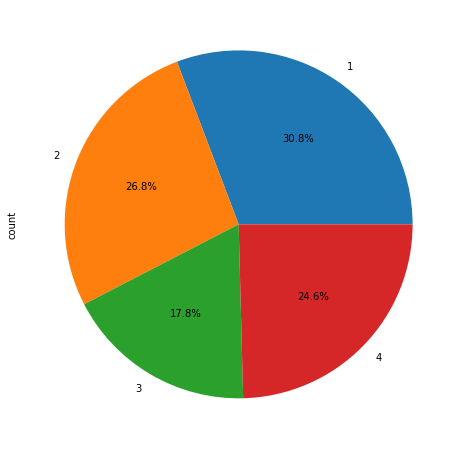

In [17]:
df.groupby("weather")["count"].mean().plot(kind="pie",figsize=(12,8),autopct="%1.1f%%")

#### average user per weather is higher on weather 1 about 31% users
#### average user per weather is lower on weather 3 about 18% users

# Effect of season

In [18]:
a=df.groupby("season")["count"].sum().reset_index()
a

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


<AxesSubplot:xlabel='season', ylabel='count'>

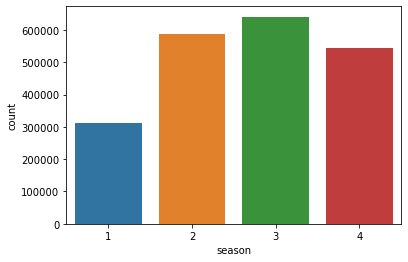

In [19]:
sns.barplot(data=a,x="season",y="count")

#### total no of users maximum in season 3
#### total no of users minimum in season 1

# Average user on each season

In [20]:
a=df.groupby("season")["count"].mean().reset_index()
a["percent_user"]=(a["count"]/a.sum()[1]*100).round(2)
a

,season,count,percent_user
0,1,116.343261,15.21
1,2,215.251372,28.14
2,3,234.417124,30.64
3,4,198.988296,26.01


<AxesSubplot:ylabel='count'>

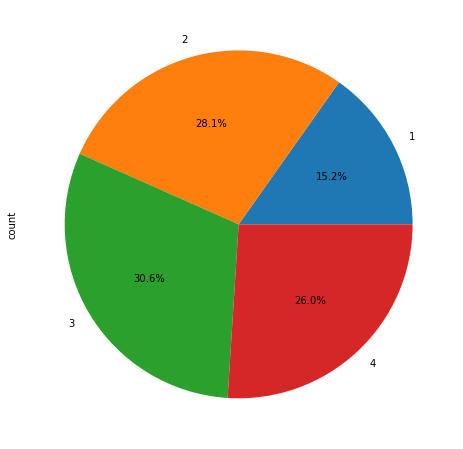

In [21]:
df.groupby("season")["count"].mean().plot(kind="pie",figsize=(12,8),autopct="%1.1f%%")

#### Average no of users maximum in season3 nearly 30% followed by season 2 nearly 28%
#### Average no of users minimum in season1 nearly 15%

# No of user in holidays and working days

In [22]:
d=df.groupby("workingday")["count"].count().reset_index()
d['Percentage']=(d["count"]/d.sum()[1]*100).round(2)
d

,workingday,count,Percentage
0,0,3474,31.91
1,1,7412,68.09


<AxesSubplot:ylabel='count'>

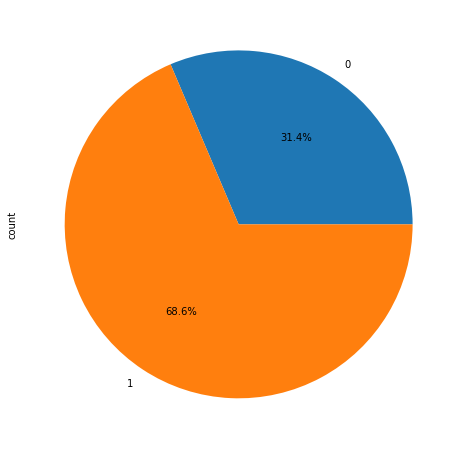

In [23]:
df.groupby("workingday")["count"].sum().plot(kind="pie",figsize=(12,8),autopct="%1.1f%%")

#### About 68% of user used in working days and about 32% users used in holidays
#### so working days has most no of users

# Effect of humidity on user count

<AxesSubplot:xlabel='humidity', ylabel='count'>

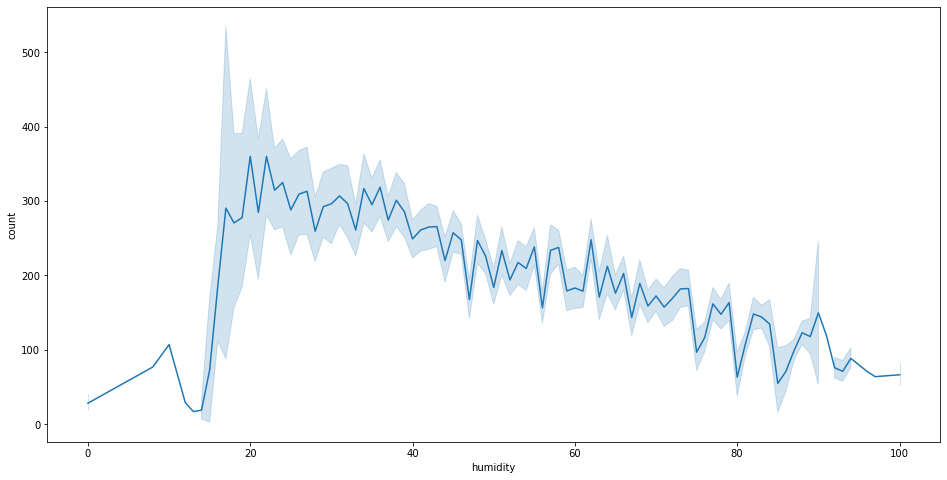

In [24]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x="humidity",y="count")

### Maximum no of users found in humidity between 20-40 after a slight decrease in no of users also can be seen in the graph

# Effect of windspeed on user count

In [25]:
a=df.groupby("windspeed")["count"].sum().reset_index()
a

,windspeed,count
0,0.0000,211526
1,6.0032,128938
2,7.0015,175627
3,8.9981,196723
4,11.0014,213791
5,12.9980,210744
6,15.0013,202611
7,16.9979,177034
8,19.0012,147403
9,19.9995,110816


<AxesSubplot:xlabel='windspeed', ylabel='count'>

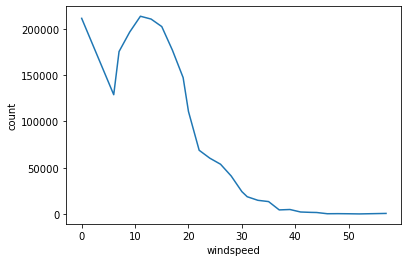

In [26]:
sns.lineplot(data=a,x="windspeed",y="count")

### Increasing the windspeed decreases the no of users

## Extracting month day and year from the feature datetime

In [27]:
df_new=df.copy()
df_new["month"]=df_new["datetime"].dt.month_name()
df_new["day"]=df_new["datetime"].dt.day
df_new["dayname"]=df_new["datetime"].dt.day_name()
df_new["year"]=df_new["datetime"].dt.year

In [28]:
df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,dayname,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,January,1,Saturday,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,January,1,Saturday,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,January,1,Saturday,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,January,1,Saturday,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,January,1,Saturday,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,December,19,Wednesday,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,December,19,Wednesday,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,December,19,Wednesday,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,December,19,Wednesday,2012


# No of users in each days

In [29]:
a=df_new.groupby("dayname")["count"].sum().reset_index().sort_values("count",ascending=False)
a

,dayname,count
2,Saturday,311518
4,Thursday,306401
0,Friday,302504
1,Monday,295296
6,Wednesday,292226
5,Tuesday,291985
3,Sunday,285546


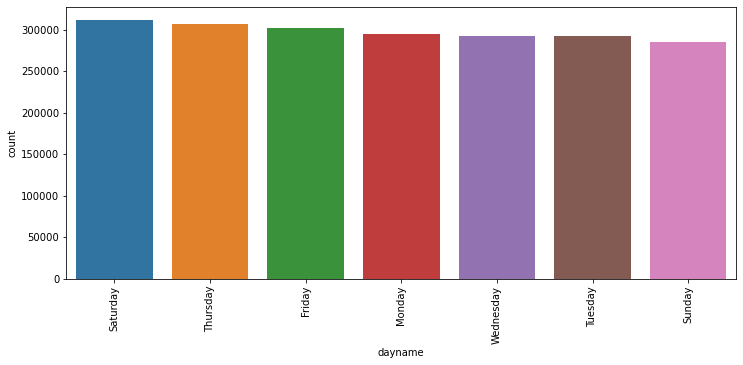

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(data=a,x="dayname",y="count")
plt.xticks(rotation=90)
plt.show()

#### No of users in each day is almost same

In [31]:
a=df_new.groupby("month")["count"].sum().reset_index().sort_values("count",ascending=False)
a

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


# No of users in each month

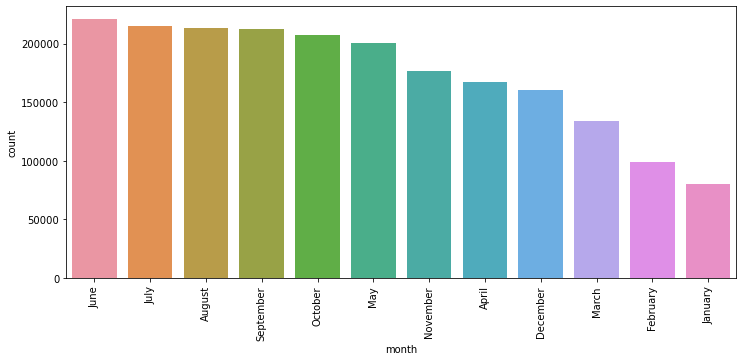

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(data=a,x="month",y="count")
plt.xticks(rotation=90)
plt.show()

#### No of users in june, july, august, september have most no of users
#### Jan, feb, march have least no of users

# User count vs each years season

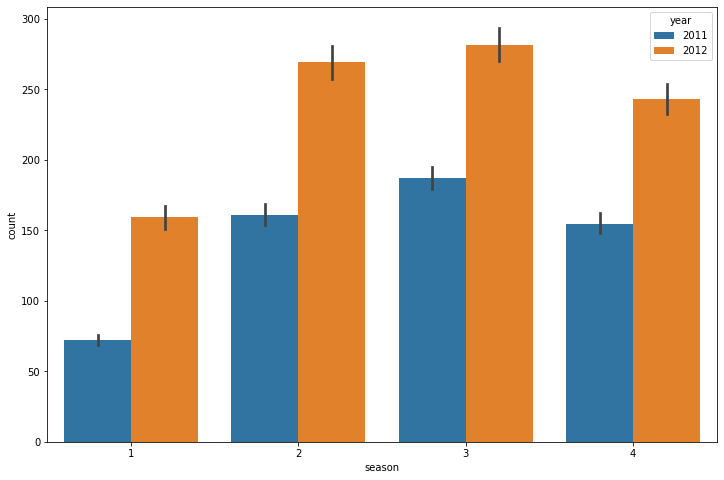

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x="season",y="count",hue="year",data=df_new)
plt.show()

#### in both year season 3 has most no of users
#### no of users in 2012 is greater than 2011

# Casual users in each years season

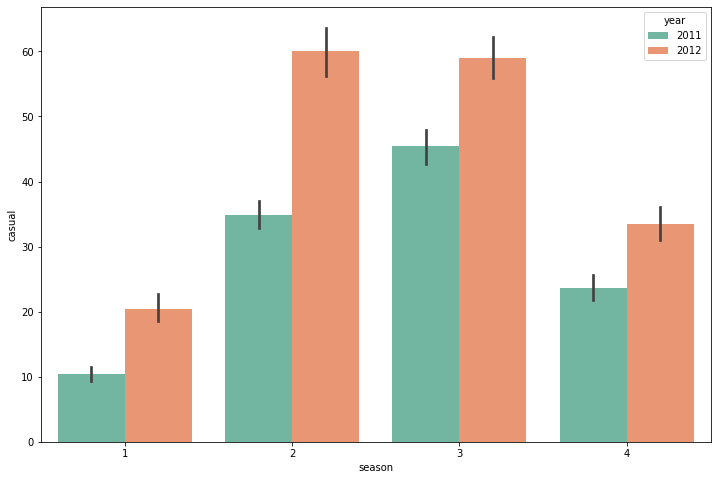

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_new,x="season",y="casual",hue="year",palette="Set2")
plt.show()

#### no of casual users increasing over year
#### in 2012 no of casual users more in season 2
#### in 2011 no of casual users more in season 3 

# Registered users in each years season

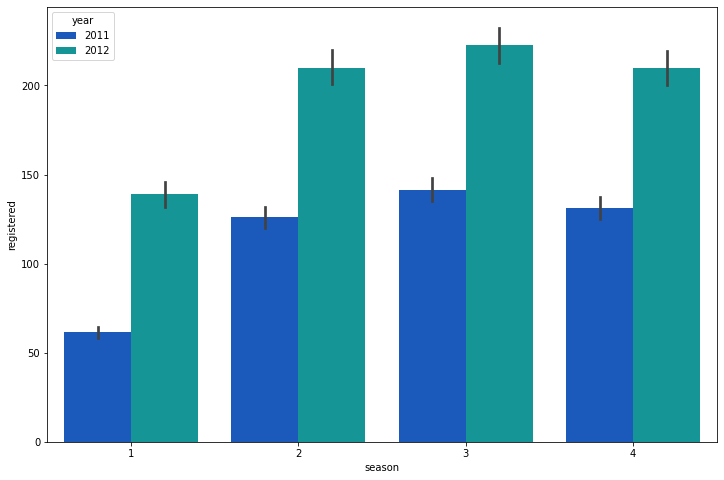

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_new,x="season",y="registered",hue="year",palette="winter")
plt.show()

#### no of registered user more in 2012 compred to 2011
#### more registration seen in season 3 and less in season1

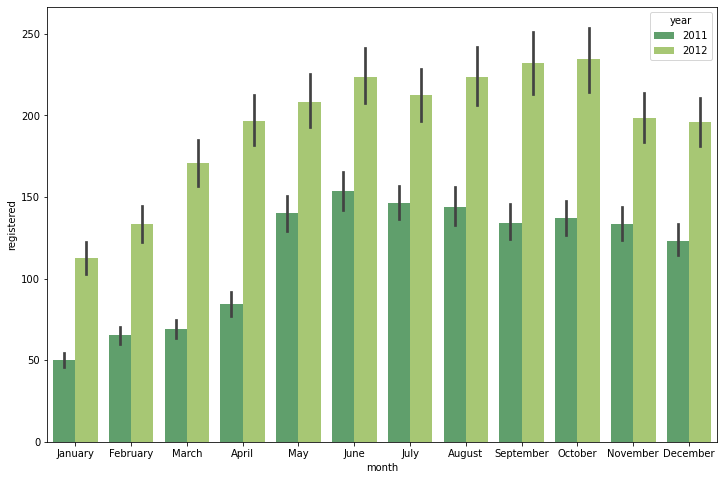

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_new,x="month",y="registered",hue="year",palette="summer")
plt.show()

#### no of registration more in august,september,october
#### no of registration less in jan feb, march

# Effect of temperature in each season and month

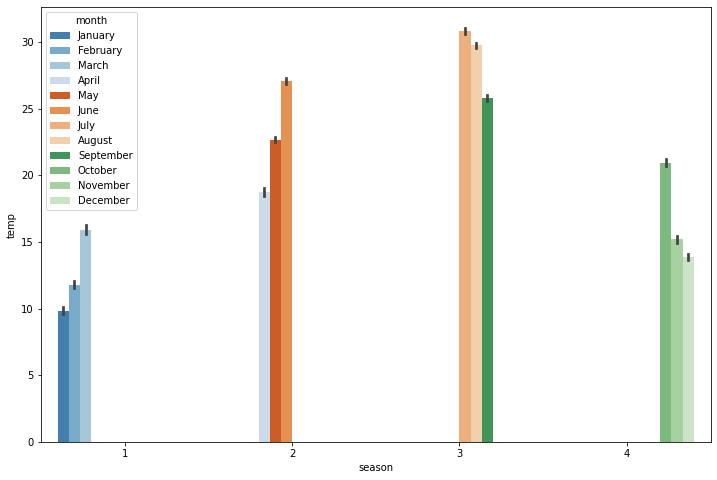

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_new,x="season",y="temp",hue="month",palette="tab20c")
plt.show()

#### seson 3 that is july, aug, sep has highest temperature
#### season 1 that is jan, feb, march has lowest temperature

# User count in each season and month

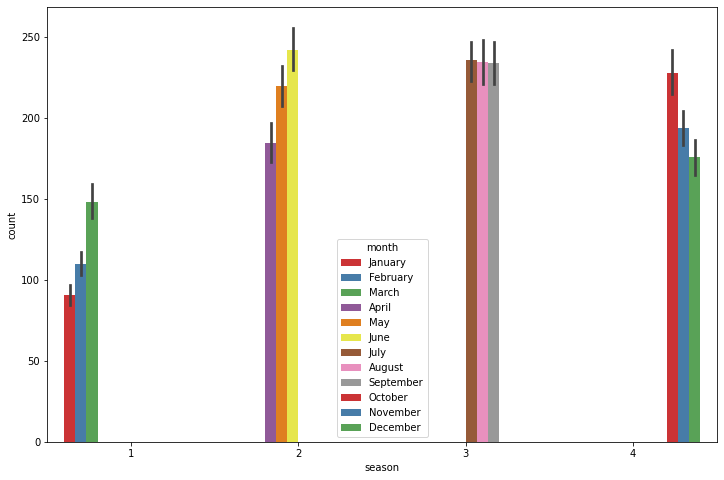

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_new,x="season",y="count",hue="month",palette="Set1")
plt.show()

#### season 3 ie july august and september have most no of users and season 1 jan, feb, march have least no of users

# Converting features temperature,humidity,windspeed to bins

In [39]:
df_new["temp_bin"]=pd.cut(df_new["temp"],bins=[-1,10,20,30,45],labels=["verylow_temp","low_temp","medium_temp","high_temp"])
df_new["atemp_bin"]=pd.cut(df_new["atemp"],bins=[-1,10,20,30,46],labels=["verylow_atemp","low_atemp","medium_atemp","high_atemp"])
df_new["humidity_bin"]=pd.cut(df_new["humidity"],bins=[-1,25,50,75,101],labels=["humidity<25%","humidity25-50%","humidity50-75%","humidity75-100%"])
df_new["windspeed_bin"]=pd.cut(df_new["temp"],bins=[-1,15,30,45,60],labels=["low_wind","medium_wind","high_wind","very_high_wind"])
df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,dayname,year,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,January,1,Saturday,2011,verylow_temp,low_atemp,humidity75-100%,low_wind
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,January,1,Saturday,2011,verylow_temp,low_atemp,humidity75-100%,low_wind
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,January,1,Saturday,2011,verylow_temp,low_atemp,humidity75-100%,low_wind
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,January,1,Saturday,2011,verylow_temp,low_atemp,humidity50-75%,low_wind
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,January,1,Saturday,2011,verylow_temp,low_atemp,humidity50-75%,low_wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,December,19,Wednesday,2012,low_temp,low_atemp,humidity25-50%,medium_wind
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,December,19,Wednesday,2012,low_temp,low_atemp,humidity50-75%,low_wind
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,December,19,Wednesday,2012,low_temp,low_atemp,humidity50-75%,low_wind
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,December,19,Wednesday,2012,low_temp,low_atemp,humidity50-75%,low_wind


# Boxplot of features converted to bins

<AxesSubplot:xlabel='windspeed_bin', ylabel='count'>

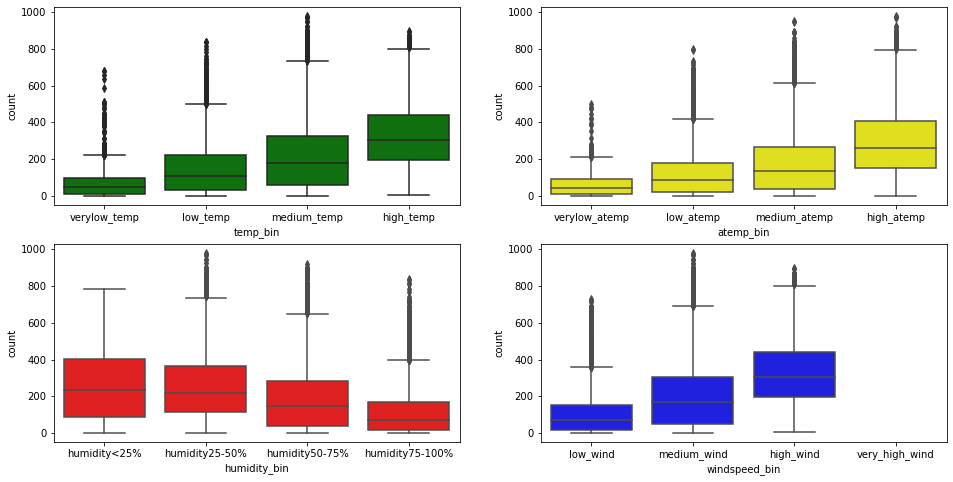

In [40]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(16,8))
sns.boxplot(data=df_new,x="temp_bin",y="count",color="green",ax=axs[0,0])
sns.boxplot(data=df_new,x="atemp_bin",y="count",color="yellow",ax=axs[0,1])
sns.boxplot(data=df_new,x='humidity_bin',y="count",color="red",ax=axs[1,0])
sns.boxplot(data=df_new,x='windspeed_bin',y="count",color="blue",ax=axs[1,1])

# Which time bike renting more demand

In [41]:
df_new["Time_hour"]=df_new["datetime"].dt.strftime("%H")
plt.figure(figsize=(15,7))
df_new.groupby("Time_hour")["count"].mean().reset_index()

,Time_hour,count
0,00,55.138462
1,01,33.859031
2,02,22.899554
3,03,11.757506
4,04,6.407240
5,05,19.767699
6,06,76.259341
7,07,213.116484
8,08,362.769231
9,09,221.780220


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Time_hour'>

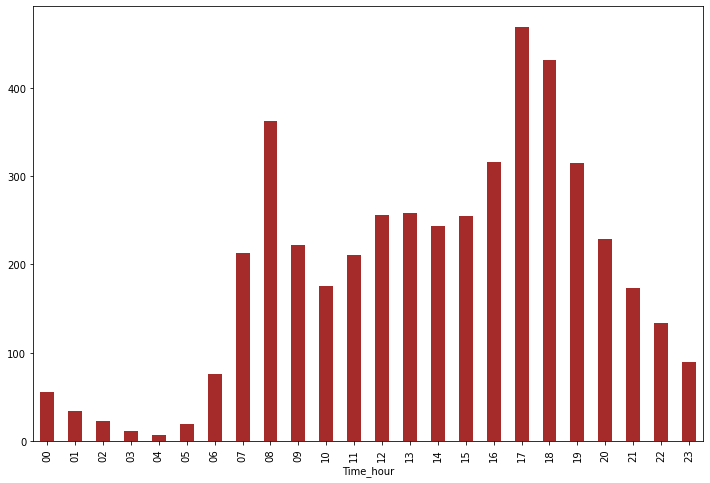

In [42]:
df_new.groupby("Time_hour")["count"].mean().plot(kind="bar",figsize=(12,8),color="brown")

### evening 5'oclock and 6'oclock and morning 8'oclock have most no of users


# Renting of bikes in each season different times

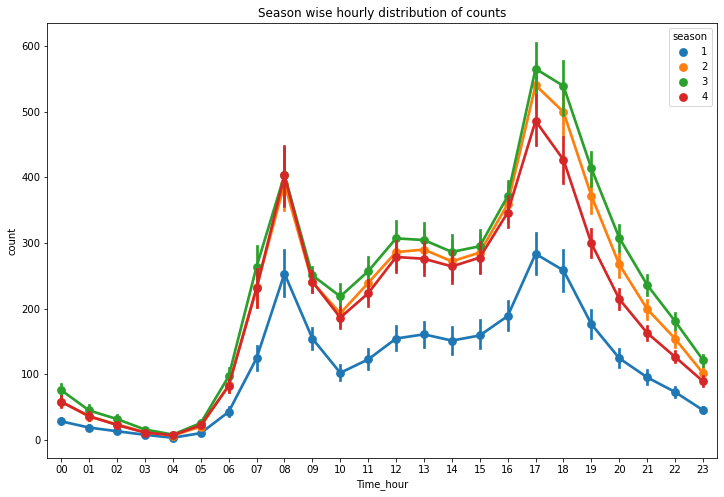

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.pointplot(data=df_new, x='Time_hour', y='count', hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

#### bike usage trends in every hour is same as each season

# chi square test to check weather has any impact on the season

- h0-null hypothesis-weather is dependent on season
- h1-alternate hypothesis-weather is independent on season

In [44]:
import scipy.stats as stats

In [45]:
df_hypo=pd.crosstab(df.weather,df.season,margins=True,margins_name="Total")
df_hypo

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [46]:
# weather 4 has less counts so removing 4
df_hyp=df[-(df["weather"]==4)]
df_hyp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [47]:
df_hypo=pd.crosstab(df_hyp.weather,df_hyp.season,margins=True,margins_name="Total")
df_hypo

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [48]:
stat,p_value,dof,expected=stats.chi2_contingency(df_hypo)
stat,p_value,dof,expected

(46.10145731073249,
 6.664576536706683e-06,
 12,
 array([[ 1774.04869086,  1805.76352779,  1805.76352779,  1806.42425356,
          7192.        ],
        [  699.06201194,   711.55920992,   711.55920992,   711.81956821,
          2834.        ],
        [  211.8892972 ,   215.67726229,   215.67726229,   215.75617823,
           859.        ],
        [ 2685.        ,  2733.        ,  2733.        ,  2734.        ,
         10885.        ]]))

In [49]:
alpha=.05
if p_value >= alpha:
    print("accept the null hypothesis: weather is independent of the season" )
else:
    print("reject the null hypothesis: weather is dependent of the season")

reject the null hypothesis: weather is dependent of the season


# Chi square test to check weather has any impact on the working day

In [50]:
#H0 = workingday is Independent on season
#H1 = workingday is dependent on season
df_count_season = pd.crosstab(df.workingday,df.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [51]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)
stat, p_value, dof, expected

(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [52]:
alpha = 0.05
if p_value >= alpha:
    print('We Accept the Null Hypothesis : Workingday is Independent on season ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season 


# Anova test to check bike usage has any impact on season

- Null hypothesis H0 - count of bikes is similar across various season
- Alternative hypothesis H1 - count of bikes is different across various season

In [53]:
#season1=df.loc[df.season==1,"count"]
season_1=df[df["season"]==1]["count"]
season_2=df[df["season"]==2]["count"]
season_3=df[df["season"]==3]["count"]
season_4=df[df["season"]==4]["count"]

In [54]:
p_value=stats.f_oneway(season_1,season_2,season_3,season_4)[1]
print("P-value",p_value)

P-value 6.164843386499654e-149


In [55]:
alpha=0.05
if p_value>alpha:
    print("accept null hypothesis: count of bikes is similar across various season")
else:
    print("reject null hupothesis: count of bikes is different across various season")

reject null hupothesis: count of bikes is different across various season


# Anova test to check bike usage has any impact on weather

- Null hypothesis H0 :count of bikes is similar across various weather
- Alternative hypothesis H1:count of bikes is different across various weather

In [56]:
weather_1=df[df['weather']==1]["count"]
weather_2=df[df["weather"]==2]["count"]
weather_3=df[df["weather"]==3]["count"]
weather_4=df[df["weather"]==4]["count"]

In [57]:
p_value=stats.f_oneway(weather_1,weather_2,weather_3,weather_4)[1]
print("P-value",p_value)

P-value 5.482069475935669e-42


In [58]:
alpha=0.05
if p_value>alpha:
    print("accept null hypothesis: count of bikes is similar across various weather")
else:
    print("reject null hupothesis: count of bikes is different across various weather")

reject null hupothesis: count of bikes is different across various weather


# Recommendations

- Months like January, February and march sees less amount of booking to increase it we can provide a discount on the booking to attract more customres.
- Most demand in evening time (16PM-19PM). so in this time period more number of cycle should be provided.
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- Working days sees more booking so we can provide an offer during weekends or holidays to bring in more bookings.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
- Morning 0- 6AM less amount of users so we can provide offers during that time.

In [59]:
pip install -U notebook-as-pdf